# IIT AGNE DATA SCIENCE CHALLENGE

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

train = pd.read_csv("problem/training.csv")
test = pd.read_csv("problem/testing.csv")

gr2_var = ['Date', 'Identifier', 'Dep_Var', 
           'Gr2Ind_Var1', 'Gr2Ind_Var2', 'Gr2Ind_Var3', 'Gr2Ind_Var4',
           'Gr2Ind_Var5', 'Gr2Ind_Var6', 'Gr2Ind_Var7', 'Gr2Ind_Var8', 
           'Gr2Ind_Var9', 'Gr2Ind_Var10', 'Gr2Ind_Var11', 'Gr2Ind_Var12']
train_gr2 = train[gr2_var]


## DATA EXPLORATION

In [110]:
train.head(10)

,Date,Identifier,Dep_Var,Gr1Ind_Var1,Gr1Ind_Var2,Gr1Ind_Var3,Gr1Ind_Var4,Gr1Ind_Var5,Gr1Ind_Var6,Gr1Ind_Var7,...,Gr2Ind_Var3,Gr2Ind_Var4,Gr2Ind_Var5,Gr2Ind_Var6,Gr2Ind_Var7,Gr2Ind_Var8,Gr2Ind_Var9,Gr2Ind_Var10,Gr2Ind_Var11,Gr2Ind_Var12
0,2012-10-22,1855,16,91624.526353,0.981399,-0.032599,0.030106,0.010643,0.030998,0.703471,...,0.0,0.0,0.181818,0.0,0.00,0.00,0.0,0.0,0.909091,0.165289
1,2012-10-22,9079,13,472.315066,0.980664,0.058861,-0.010248,-0.012876,-0.010084,-0.124329,...,0.0,0.0,0.125000,0.0,0.00,0.00,0.0,0.0,0.750000,0.093750
2,2012-10-22,49725,16,1039.574650,0.852444,0.072414,0.011823,0.002200,0.004664,0.101501,...,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.600000,0.000000
3,2012-10-22,9569,9,4241.026023,1.094491,-0.015389,0.004078,0.002119,0.002838,0.079300,...,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.857143,0.000000
4,2012-10-22,6828,6,15404.194258,1.020933,0.009126,-0.003701,-0.003559,-0.017787,-0.335150,...,0.0,0.0,0.076923,0.0,0.00,0.00,0.0,0.0,0.615385,0.047337
5,2012-10-22,49458,9,12318.350291,0.900658,-0.020936,0.020658,0.011099,0.006387,0.236135,...,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.888889,0.000000
6,2012-10-22,27058,8,326.407950,0.739143,0.389163,0.025790,0.026286,0.167904,-1.329651,...,0.0,0.0,0.200000,0.0,0.00,0.00,0.0,0.0,0.900000,0.180000
7,2012-10-22,41669,19,328.910593,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.200000,1.0,1.00,1.00,1.0,0.0,0.600000,0.120000
8,2012-10-22,2786,0,1077.448289,1.946541,-0.217105,-0.418280,-0.406964,-4.218045,6.163436,...,1.0,1.0,0.222222,0.0,0.25,0.25,0.0,1.0,0.888889,0.197531
9,2012-10-22,12014,12,6808.273688,0.899283,0.015021,0.012966,0.010777,0.005893,0.100821,...,0.0,0.0,0.333333,0.0,0.00,0.00,1.0,0.0,0.777778,0.259259


In [111]:
train.describe()

,Identifier,Dep_Var,Gr1Ind_Var1,Gr1Ind_Var2,Gr1Ind_Var3,Gr1Ind_Var4,Gr1Ind_Var5,Gr1Ind_Var6,Gr1Ind_Var7,Gr1Ind_Var8,...,Gr2Ind_Var3,Gr2Ind_Var4,Gr2Ind_Var5,Gr2Ind_Var6,Gr2Ind_Var7,Gr2Ind_Var8,Gr2Ind_Var9,Gr2Ind_Var10,Gr2Ind_Var11,Gr2Ind_Var12
count,36369.000000,36369.000000,36248.000000,32100.000000,32098.000000,32030.000000,31919.000000,31883.000000,31882.000000,31919.000000,...,31285.000000,31285.000000,31285.000000,31285.000000,31281.000000,31281.000000,31285.000000,31285.000000,31285.000000,31285.000000
mean,27767.300393,9.503698,8343.974848,1.083194,0.006428,-0.002010,0.080829,-0.344278,-0.336185,-0.142630,...,0.427937,0.427937,0.141041,0.033307,0.110012,0.110012,0.041713,0.385488,0.766697,0.111728
std,20043.323066,5.766324,31432.864815,0.569156,0.119944,0.156400,2.461501,33.338353,77.661312,13.427047,...,0.608584,0.608584,0.111496,0.179439,0.159213,0.159213,0.199936,0.568001,0.132951,0.092954
min,1.000000,0.000000,0.053117,0.345728,-0.875318,-2.553673,-13.896268,-5383.021622,-13036.571572,-1552.386849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13148.000000,5.000000,455.545623,0.898578,-0.044046,-0.015655,-0.014106,-0.013841,-0.266394,-0.014990,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,0.000000
50%,23674.000000,10.000000,1436.608896,0.977577,0.006424,0.002724,0.001858,0.004052,0.041530,0.002774,...,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.098765
75%,42876.000000,15.000000,4626.641639,1.101313,0.059344,0.020357,0.018572,0.017708,0.246932,0.015095,...,1.000000,1.000000,0.222222,0.000000,0.250000,0.250000,0.000000,1.000000,0.875000,0.172840
max,130774.000000,19.000000,814083.837238,18.720995,1.982979,8.405200,225.435438,279.806474,2878.059512,293.530193,...,3.000000,3.000000,0.750000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.611111


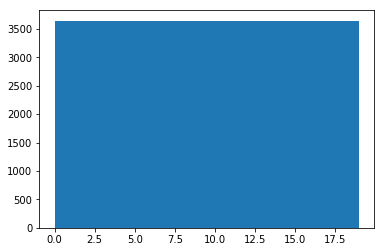

In [112]:
plt.hist(train['Dep_Var'], )
plt.show()

## Select Group 2 variables

In [113]:
train_gr2.head()

,Date,Identifier,Dep_Var,Gr2Ind_Var1,Gr2Ind_Var2,Gr2Ind_Var3,Gr2Ind_Var4,Gr2Ind_Var5,Gr2Ind_Var6,Gr2Ind_Var7,Gr2Ind_Var8,Gr2Ind_Var9,Gr2Ind_Var10,Gr2Ind_Var11,Gr2Ind_Var12
0,2012-10-22,1855,16,2.0,NaN,0.0,0.0,0.181818,0.0,0.0,0.0,0.0,0.0,0.909091,0.165289
1,2012-10-22,9079,13,1.0,NaN,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.750000,0.093750
2,2012-10-22,49725,16,0.0,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.600000,0.000000
3,2012-10-22,9569,9,0.0,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.857143,0.000000
4,2012-10-22,6828,6,1.0,NaN,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.615385,0.047337


In [114]:
train_gr2.corr()

,Identifier,Dep_Var,Gr2Ind_Var1,Gr2Ind_Var2,Gr2Ind_Var3,Gr2Ind_Var4,Gr2Ind_Var5,Gr2Ind_Var6,Gr2Ind_Var7,Gr2Ind_Var8,Gr2Ind_Var9,Gr2Ind_Var10,Gr2Ind_Var11,Gr2Ind_Var12
Identifier,1.000000,-0.011874,-0.176934,NaN,-0.064317,-0.064317,-0.124575,-0.010637,-0.047910,-0.047910,-0.019584,-0.061116,-0.129677,-0.147512
Dep_Var,-0.011874,1.000000,0.017795,NaN,-0.001839,-0.001839,0.011359,-0.002966,-0.004196,-0.004196,-0.008305,-0.000289,0.012289,0.013584
Gr2Ind_Var1,-0.176934,0.017795,1.000000,NaN,0.530194,0.530194,0.933159,0.198229,0.506449,0.506449,0.251982,0.487297,0.268227,0.923811
Gr2Ind_Var2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gr2Ind_Var3,-0.064317,-0.001839,0.530194,NaN,1.000000,1.000000,0.565769,0.306788,0.964298,0.964298,0.180882,0.943218,0.171707,0.561045
Gr2Ind_Var4,-0.064317,-0.001839,0.530194,NaN,1.000000,1.000000,0.565769,0.306788,0.964298,0.964298,0.180882,0.943218,0.171707,0.561045
Gr2Ind_Var5,-0.124575,0.011359,0.933159,NaN,0.565769,0.565769,1.000000,0.227854,0.564697,0.564697,0.286986,0.522769,0.242352,0.972887
Gr2Ind_Var6,-0.010637,-0.002966,0.198229,NaN,0.306788,0.306788,0.227854,1.000000,0.341578,0.341578,0.405873,0.078194,0.038829,0.218690
Gr2Ind_Var7,-0.047910,-0.004196,0.506449,NaN,0.964298,0.964298,0.564697,0.341578,1.000000,1.000000,0.191006,0.917703,0.157019,0.554716
Gr2Ind_Var8,-0.047910,-0.004196,0.506449,NaN,0.964298,0.964298,0.564697,0.341578,1.000000,1.000000,0.191006,0.917703,0.157019,0.554716


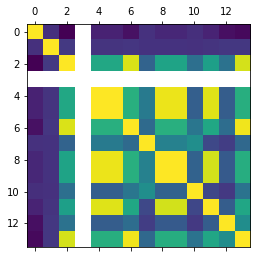

In [115]:
plt.matshow(train_gr2.corr())
plt.show()

In [116]:
train_gr2[['Dep_Var', 'Date']]
train_gr2.groupby(['Dep_Var', 'Date']).count()

Identifier  Gr2Ind_Var1  Gr2Ind_Var2  Gr2Ind_Var3  \
Dep_Var Date                                                            
0       2012-10-22         146          104            0          104   
        2013-01-20         147          104            0          104   
        2013-04-21         148           97            0           97   
        2013-07-22         148           83            0           83   
        2013-10-22         152           99            0           99   
        2014-01-21         151           96            0           96   
        2014-04-22         151           88            0           88   
        2014-07-23         149           91            0           91   
        2014-10-23         152          111            0          111   
        2015-01-21         154          106            0          106   
        2015-04-22         156           94            0           94   
        2015-07-23         157           98            0           98   
1       2012-10-22         147          124            0          124   
        2013-01-20         148          122            0          122   
        2013-04-21         149          121            0          121   
        2013-07-22         149          122            0          122   
        2013-10-22         153          124            0          124   
        2014-01-21         152          129            0          129   
        2014-04-22         152          132            0          132   
        2014-07-23         149          113            0          113   
        2014-10-23         153          133            0          133   
        2015-01-21         154          115            0          115   
        2015-04-22         157          124            0          124   
        2015-07-23         157          128            0          128   
2       2012-10-22         147          118            0          118   
        2013-01-20         148          127            0          127   
        2013-04-21         148          118            0          118   
        2013-07-22         149          121            0          121   
        2013-10-22         153          126            0          126   
        2014-01-21         152          125            0          125   
...                        ...          ...          ...          ...   
17      2014-04-22         151          133            0          133   
        2014-07-23         149          128            0          128   
        2014-10-23         153          135            0          135   
        2015-01-21         154          136            0          136   
        2015-04-22         156          133            0          133   
        2015-07-23         158          143            0          143   
18      2012-10-22         147          121            0          121   
        2013-01-20         148          117            0          117   
        2013-04-21         149          132            0          132   
        2013-07-22         149          125            0          125   
        2013-10-22         153          132            0          132   
        2014-01-21         152          124            0          124   
        2014-04-22         152          131            0          131   
        2014-07-23         149          140            0          140   
        2014-10-23         153          121            0          121   
        2015-01-21         154          137            0          137   
        2015-04-22         157          136            0          136   
        2015-07-23         157          134            0          134   
19      2012-10-22         147          121            0          121   
        2013-01-20         148          110            0          110   
        2013-04-21         149          121            0          121   
        2013-07-22         149          115            0          115   
     

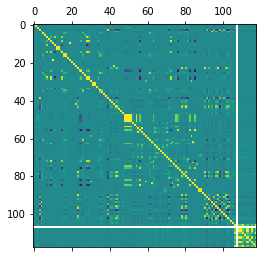

In [117]:
plt.matshow(train.corr())
plt.show()

In [118]:
# dates = plt.dates.date2num(train.Date)
# plt.plot_date(dates, train.Dep_Var)

## Modelling by Date Group

Instead to do 'a kind of normaluzation by date', we will try to fit a model by goup of dates. Then pick the models that generalize better between the groups.

In [139]:
# replace missing value with the mean of each column:
train.fillna(train.mean(), inplace=True)
# X_train.fillna(X_train.mean())
train.describe()

# we remove Gr2Ind_Var2, because it only contains missing values
train = train.drop(columns=['Gr2Ind_Var2', 'Date', 'Identifier'])
# train = train.drop(columns=['Gr2Ind_Var2'])

# sum(len(train) - train.count())
train.head()

,Dep_Var,Gr1Ind_Var1,Gr1Ind_Var2,Gr1Ind_Var3,Gr1Ind_Var4,Gr1Ind_Var5,Gr1Ind_Var6,Gr1Ind_Var7,Gr1Ind_Var8,Gr1Ind_Var9,...,Gr2Ind_Var3,Gr2Ind_Var4,Gr2Ind_Var5,Gr2Ind_Var6,Gr2Ind_Var7,Gr2Ind_Var8,Gr2Ind_Var9,Gr2Ind_Var10,Gr2Ind_Var11,Gr2Ind_Var12
0,16,91624.526353,0.981399,-0.032599,0.030106,0.010643,0.030998,0.703471,0.010389,0.027373,...,0.0,0.0,0.181818,0.0,0.0,0.0,0.0,0.0,0.909091,0.165289
1,13,472.315066,0.980664,0.058861,-0.010248,-0.012876,-0.010084,-0.124329,-0.010085,9.748330,...,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.750000,0.093750
2,16,1039.574650,0.852444,0.072414,0.011823,0.002200,0.004664,0.101501,0.002900,-5.534298,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.600000,0.000000
3,9,4241.026023,1.094491,-0.015389,0.004078,0.002119,0.002838,0.079300,0.001504,-1.529305,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.857143,0.000000
4,6,15404.194258,1.020933,0.009126,-0.003701,-0.003559,-0.017787,-0.335150,-0.017833,-0.802841,...,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.615385,0.047337


### First try with the first group of date

#### One date to the next

In [140]:
# print(train.Date.unique())

# # first train set:
# train_20121022 = train.loc[train['Date'] == '2012-10-22']
# train_20121022 = train_20121022.iloc[:,2:]
# print(train_20121022.head())
# # split btw attributes and labels: (later, should be done for each date group.)
# train_20121022_X = train_20121022.iloc[:, 1:].values  
# train_20121022_y = train_20121022.iloc[:, 0].values  

# # first test set:
# train_20130120 = train.loc[train['Date'] == '2013-01-20']
# train_20130120 = train_20130120.iloc[:,2:]
# train_20130120_X = train_20130120.iloc[:, 1:].values  
# train_20130120_y = train_20130120.iloc[:, 0].values 

# # train_20121022_X.head()
# # train_20121022_y.head()
# train_20121022_X

# X_train = train_20121022_X
# y_train = train_20121022_y
# X_test = train_20130120_X
# y_test = train_20130120_y

AttributeError: 'DataFrame' object has no attribute 'Date'

In [141]:
# Try with the full dataset, all dates:

train['is_train'] = np.random.uniform(0, 1, len(train)) <= .75 # random 75% train set

# train set:
train_train = train[train['is_train']==True]
# split btw attributes and labels: (later, should be done for each date group.)
X_train = train_train.iloc[:, 1:].values  
y_train = train_train.iloc[:, 0].values  

# test set:
train_test = train[train['is_train']==False]
# split btw attributes and labels: (later, should be done for each date group.)
X_test = train_test.iloc[:, 1:].values  
y_test = train_test.iloc[:, 0].values  


In [142]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [143]:
# Train the Random Forrest Classifier
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [145]:
np.corrcoef(y_pred, y_test)
# y_test

array([[1.        , 0.04247465],
       [0.04247465, 1.        ]])

In [146]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[147  55  29  26  17  14   7  11   8   6   7   8   8   5  12   7  12  15
   22  47]
 [ 82  57  40  31  37  28  18  11  18  12  15   7  11   9   5  19  17  17
   17  32]
 [ 56  40  47  29  28  22  20  29  17  14  12  17  24  13  10  11  13  19
   14  21]
 [ 40  48  37  25  35  25  30  30  17  23  12  22  18  10  10  14   9  12
   12  20]
 [ 32  26  30  21  38  36  27  28  17  22  28  20  18  12  21  16  15  17
   15   6]
 [ 20  33  36  28  27  27  35  28  27  22  23  26  28  18  19  14  12  11
   11  14]
 [ 28  33  41  38  37  33  33  32  23  28  19  22  17  19  12  16  10  10
    8  10]
 [ 13  25  25  28  34  32  31  28  32  34  21  24  19  22  19  15  12  10
   17  10]
 [ 27  27  24  50  27  24  36  43  26  32  32  23  19  25  16  11  14  10
   18   3]
 [ 16  23  28  27  28  31  36  31  37  35  20  26  34  11  14  18  14  12
   15   6]
 [ 12  25  25  26  31  35  34  31  34  22  32  17  24  15  15  25  20  10
    9   4]
 [ 28  32  31  22  26  27  29  31  40  29  15  19  26  19  20  11